# Plots the experimental results
Ted Balabanski

In [1]:
# dependencies
from dropletsize import ScannedSPOTImage
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import gmean

# set formatting for plot
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.size": 14
})

Iterate through each scanned image, load in the scanned image, and size its particles:

In [2]:
# local path to my stored version with folders labeled with each particle diamter
PATH_TO_DATA = os.path.abspath("D:\wsp_scans")

# current path to revert back to at the end
start_path = os.getcwd()

# change the working directory to the working path
os.chdir(PATH_TO_DATA)

# iterate through the folders and each image in the
images_scanned = {}
tot_images = 0
tot_particles_identified = 0
for diameter_path in os.listdir():
    if "35" not in diameter_path:
        continue

    print(f"analyzing particles with dd = {diameter_path[2:]} um...")
    
    current_dir = os.chdir(diameter_path)
    
    for image_path in tqdm(os.listdir()):
        # update the total images
        tot_images += 1

        # initialize the image
        image_scan = ScannedSPOTImage(image_path)

        # identify the contours and update the total number of particles identified
        image_scan.size_particles(thresholds=(0, 70))
        tot_particles_identified += len(image_scan.sizes)

        # add it to the images_scanned dictionary with keys diameter
        diameter = image_scan.droplet_diameter
        try:
            images_scanned[diameter].append(image_scan)
        except KeyError:
            # initialize the diameter if it is not there
            images_scanned[diameter] = []
            
            # append it to the array with that diameter
            images_scanned[diameter].append(image_scan)

    os.chdir("..")

# revert back to the start path
os.chdir(start_path)

# print the status
print(f"Identified {tot_particles_identified} particles from {tot_images} images (average: {round(len(tot_particles_identified)/tot_images)})")

analyzing particles with dd = 35 um...


  0%|          | 0/9 [00:00<?, ?it/s]

100%|██████████| 9/9 [00:20<00:00,  2.29s/it]

Identified 15 particles from 9 images (average: 0)


Get the mean signal from the noise and plot it

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


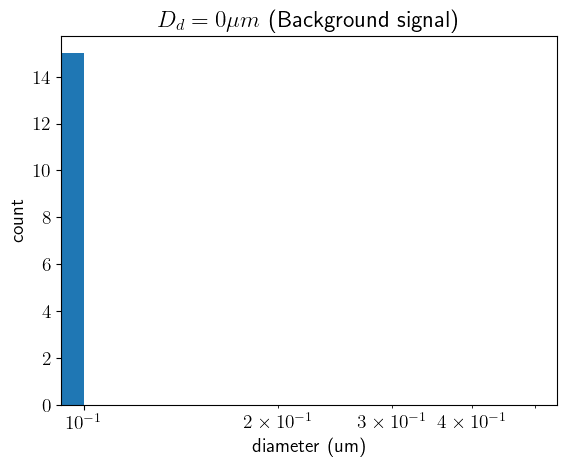

In [3]:
zero_array = np.concatenate([image.sizes for image in images_scanned[35]])
print(zero_array)
plt.title("$D_d = 0 \mu m$ (Background signal)")
plt.xlabel("diameter (um)")
plt.xscale('log')
plt.ylabel("count")
plt.hist(zero_array)
plt.show()

Plot the distribution by size and location

In [9]:
# set the location and droplet diameter
LOCATION = 1
DROPLET_DIAMETER = 35

# iterate through all the sizes
tot_sizes_array = []
for scanned_image in images_scanned[DROPLET_DIAMETER]:
    # if it is not the right one, skip it
    if scanned_image.location_number != LOCATION:
        continue

    tot_sizes_array.append(scanned_image.sizes)

# concatenate into 1 array
tot_sizes = np.concatenate(tot_sizes_array)

# statistics
geo_mean = gmean(tot_sizes)
N = tot_sizes.size

# plot
plt.xlabel("Droplet diameter ($\mu$ m)")
plt.ylabel("Count")
plt.xscale('log')
plt.text(0, 0, f"mean $d_p$ = {geo_mean:.2f} $\mu$m\nN = {N:,}")
plt.hist(tot_sizes)
plt.show()

ValueError: Image size of 450339x441 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>